In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop("customer_id", axis=1, inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.nunique()

credit_score         460
country                3
gender                 2
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
dtype: int64

In [ ]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
df.shape

(10000, 11)

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
cat_cols

['country', 'gender']

In [ ]:
import seaborn as sns

<Axes: xlabel='gender'>

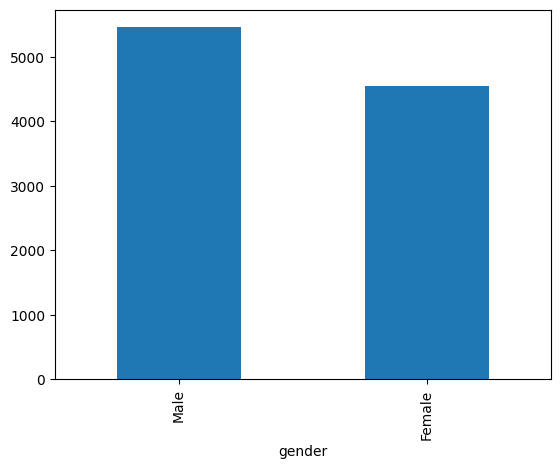

In [ ]:
df["gender"].value_counts().plot(kind="bar")

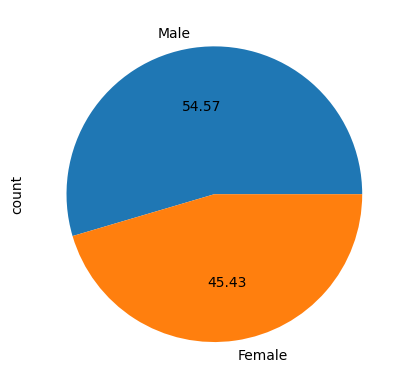

In [ ]:
df["gender"].value_counts().plot(kind="pie", autopct="%.2f");

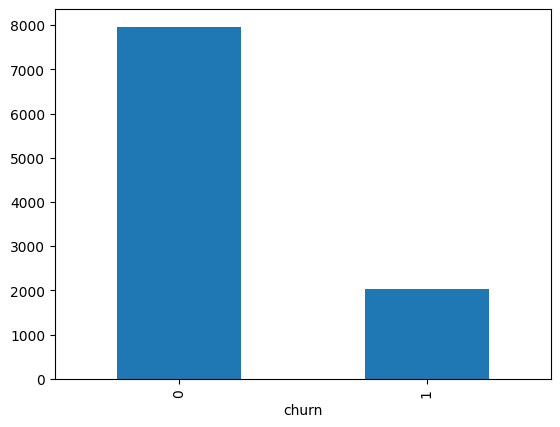

In [ ]:
df["churn"].value_counts().plot(kind="bar");

In [ ]:
df["churn"].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

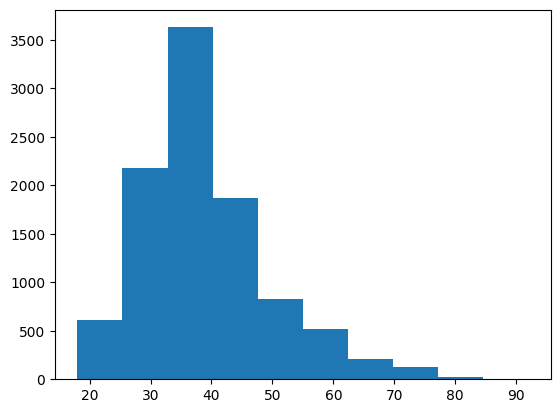

In [ ]:
plt.hist(df["age"]);

In [ ]:
df["age"].min(), df["age"].max(), df["age"].mean(), df["age"].median()

(18, 92, 38.9218, 37.0)

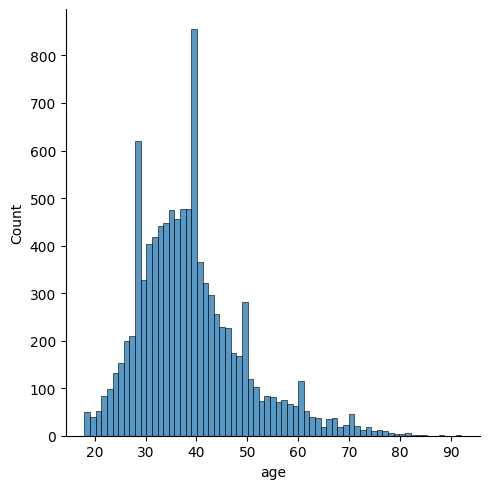

In [ ]:
sns.displot(df["age"]);

In [ ]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df["country"].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df["country"] = df["country"].map({"Germany": 0, "France": 1, "Spain": 2})
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.drop("churn", axis=1)
y = df["churn"]

In [ ]:
X.shape, y.shape

((10000, 10), (10000,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

In [ ]:
lg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lg.predict(X_test)

In [ ]:
y_pred[:5]

array([0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {
    "lg": LogisticRegression(),
    "dtc": DecisionTreeClassifier(),
    "rfc": RandomForestClassifier()
}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"{name} with accuracy {accuracy_score(y_test, y_pred)}")

lg with accuracy 0.8
dtc with accuracy 0.78
rfc with accuracy 0.8675


In [47]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

# Prediction System

In [48]:
def prediction(credit_score, country, gender, age, tenure, balance,
               products_number, credit_card, active_member, estimated_salary):
  features = np.array([[credit_score, country, gender, age, tenure, balance,
                  products_number, credit_card, active_member, estimated_salary]])
  pred = random_forest.predict(features).reshape(1, -1)
  return pred[0]

In [49]:
credit_score = 619
country = 0
gender = 0
age = 42
tenure = 2
balance = 0.00
products_number = 1
credit_card = 1
active_member = 1
estimated_salary = 101348.88

pred = prediction(credit_score, country, gender, age, tenure, balance,
                  products_number, credit_card, active_member, estimated_salary)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
pred

array([0])

In [51]:
if pred == 0:
  print("This customer is still with the bank")
else:
  print("This customer has left")

This customer is still with the bank


In [52]:
import pickle
pickle.dump(random_forest, open("rfc.pkl", "wb"))
pickle.dump(df, open("df.pkl", "wb"))